## Day 34 Lecture 1 Assignment

In this assignment, we will learn about SVR. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

In [1]:
%matplotlib inline

import seaborn as sns
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

In [2]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [3]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
absent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [5]:
absent.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

We previously used this dataset for KNN regression. Recall that we removed all correlated columns as well as columns that are a function of two or more other columns (like BMI and weight and height) as well as columns that are not useful to us (like ID).
We also created dummy variables for the categorical columns in our dataset.
Finally, we split the data into test and train (with test being 20% of the data).

Perform these actions below.

In [6]:
drop_cols = ['ID']
absent = absent.drop(columns=drop_cols)

In [7]:
# Removing rare categories
counts = absent["Reason for absence"].value_counts()
counts = counts[counts > 5]
keep_reasons = counts.index

absent = absent[absent["Reason for absence"].isin(keep_reasons)]

In [8]:
num_cols = ['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ',
            'Son', 'Pet', 'Height', 'Body mass index']

cat_cols = ['Reason for absence', 'Seasons', 'Month of absence', 'Day of the week']
drop_cats = [0, 4, 0, 2]

bin_cols = ["Disciplinary failure", "Social drinker", "Social smoker"]

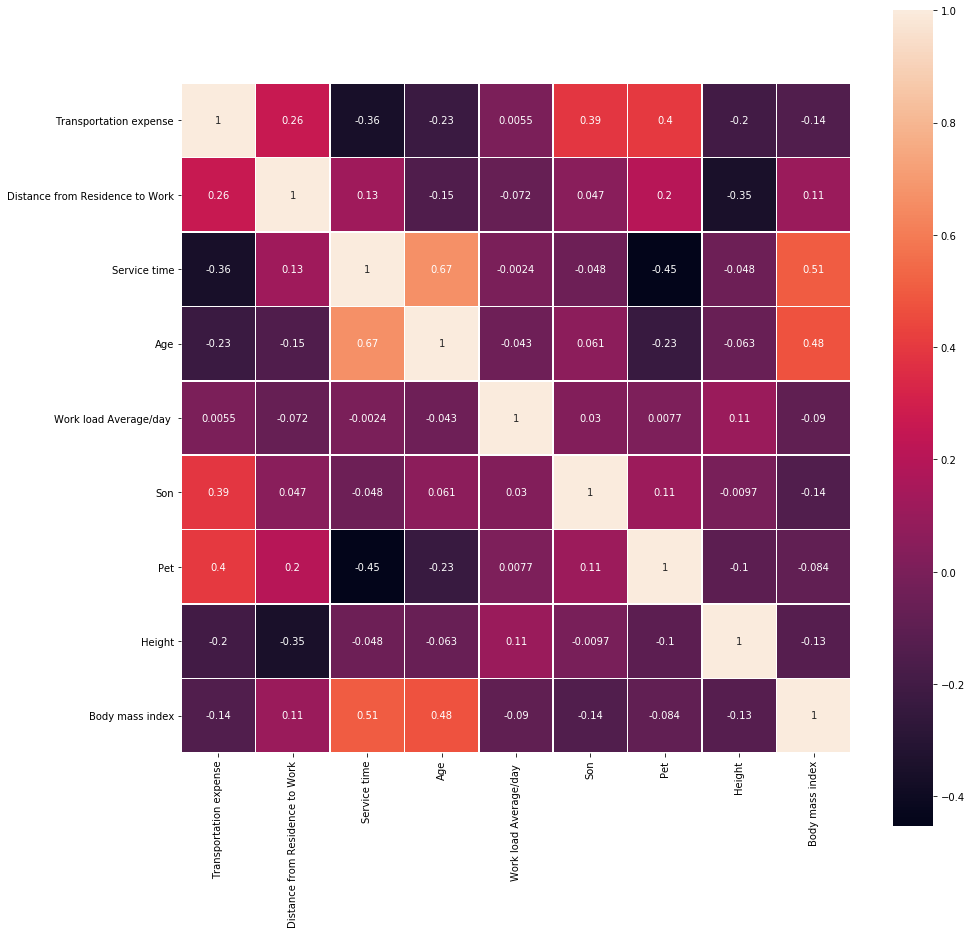

In [9]:
corr = absent[num_cols].corr()

plt.figure(figsize=(15, 15))

sns.heatmap(corr, square=True, annot=True, linewidths=.5)

plt.show()

In [10]:
#pd.get_dummies(data=absent, columns=bin_cols)

In [11]:
X = absent.drop(columns=['Absenteeism time in hours', 'Weight'])
y = absent['Absenteeism time in hours']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Generate an SVR model to predict the number of hours of absenteeism. Compare the train and test scores.

In [12]:
preprocessing = ColumnTransformer(
    [
        ("dummy", OneHotEncoder(drop=drop_cats), cat_cols),
        ("scale", StandardScaler(), num_cols),
    ],
    remainder="passthrough",
)

In [13]:
pipeline = Pipeline([("preprocessing", preprocessing), ("svr", SVR())])

If you are unhappy with your model's performance, perform a grid search to optimize C. You may also want to compare something other than R squared, like MSE, and could try some other kernels than just linear.

In [14]:
grid = {
    "svr__C": [0.01, 0.1, 1.0, 10.0],
    "svr__epsilon": [0.01, 0.1, 0.5, 1],
    "svr__kernel": ["linear", "rbf"],
}
model = GridSearchCV(pipeline, grid, verbose=1, cv=2)
model.fit(X_train, y_train)

model.best_params_

Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    4.8s finished


{'svr__C': 10.0, 'svr__epsilon': 0.1, 'svr__kernel': 'linear'}

Create a homoscedasticity (residual) plot. Look back at your KNN regression exercise (Day 32 Lecture 1). How do your model results compare?

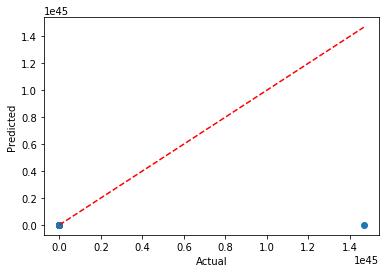

In [15]:
y_pred = model.predict(X_test)

# Only do this if using log transformed y in training
y_test = np.exp(y_test) - 1
y_pred = np.exp(y_pred) - 1

mn = y_test.min()
mx = y_test.max()

plt.scatter(y_test, y_pred)
plt.plot([mn, mx], [mn, mx], "--", c="red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()